In [4]:
%matplotlib inline
from IPython.display import Image
Image('image_path')

import pandas as pd
test = pd.read_csv('./sp21_student_kaggle.csv')

1. Create an undirected bipartite graph by referring to the following documentation. 
(https://networkx.org/documentation/stable/reference/algorithms/bipartite.html)
REF : https://www.researchgate.net/figure/Undirected-Directed-Weighted-Bipartite-graphs-A-Undirected-Graph-V-V-1-V-2_fig1_51083566
2. Create a node-link diagram differentiating the two types of nodes. For example, you
can use different colors to denote Person and Dataset. Also, encode edge weights into
the visualization. For example, you can use alpha or width to encode edge weights
3. Answer this question, “How many components are there in this graph?”
4. Extract the largest component by referring to the following documentation. This largest component is called the “main component” of the graph. (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html)
5. List the names of people who do not belong to the main component
6. Convert the main component (which is still a bipartite graph) into two unipartite graphs by referring to the following documentation. (https://networkx.org/documentation/stable/reference/algorithms/bipartite.html)
7. Visualize both persons graph and datasets graph using node-link diagrams.
8. Compute closeness centralities for all nodes in the persons graph.
9. Compute betweenness centralities for all nodes in the persons graph
10. Compute the correlation coefficient between the two centrality measures.

0.5


({1, 2, 3, 4}, {'a', 'b', 'c'})

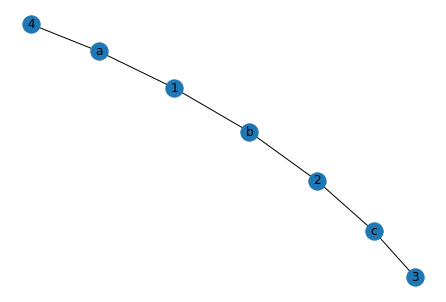

In [7]:
# example 
from networkx.algorithms import bipartite
import networkx as nx
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
# nx.is_connected(B) True
bottom_nodes, top_nodes = bipartite.sets(B)
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print(round(bipartite.density(B, bottom_nodes), 2))
# 0.5
G = bipartite.projected_graph(B, top_nodes)
RB = bipartite.random_graph(5, 7, 0.2)
RB_top = {n for n, d in RB.nodes(data=True) if d["bipartite"] == 0}
RB_bottom = set(RB) - RB_top
list(RB_top)
# [0, 1, 2, 3, 4]
list(RB_bottom)
# [5, 6, 7, 8, 9, 10, 11]

# REF : https://frhyme.github.io/python-lib/nx_bipartite/
'''
cbg = nx.complete_bipartite_graph(3, 7)
bs1, bs2 = nx.bipartite.sets(cbg)## bipartite 세트로 나누어줍니다. 

plt.figure(figsize=(8, 4))
nx.draw_networkx(cbg, pos = nx.shell_layout(cbg))
plt.axis('off')
plt.savefig("../../assets/images/markdown_img/180810_bipartite_cg.svg")
plt.show()
'''
# https://stackoverflow.com/questions/27084004/bipartite-graph-in-networkx
nx.draw(B,with_labels=True)
bipartite.sets(B)

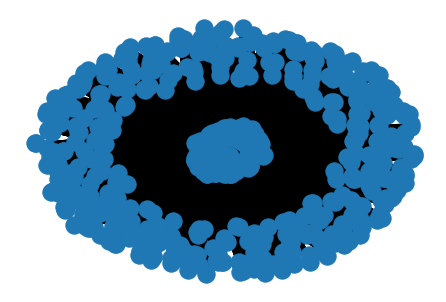

In [22]:
prob1 = nx.Graph()
# Add nodes with the node attribute "bipartite"
prob1.add_nodes_from(list(test.Name), bipartite=0)
prob1.add_nodes_from(list(test.Kaggle), bipartite=1)
node_set = []
for ii in test.Name:
    for jj in test.Kaggle:
        node_set.append((ii,jj))
prob1_edge = list(set(node_set)) # len : 11928
prob1.add_edges_from(prob1_edge)
# Add edges only between nodes of opposite node sets
# prob1.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
# nx.is_connected(B) True
bottom_nodes, top_nodes = bipartite.sets(prob1)
top_nodes = {n for n, d in prob1.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(prob1) - top_nodes
nx.draw(prob1) #,with_labels=True)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


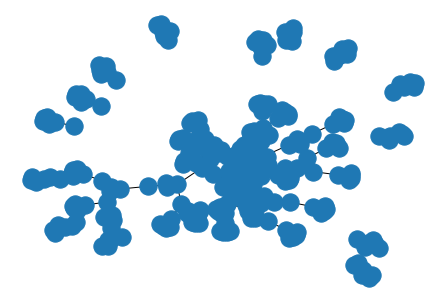

In [26]:
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
G = nx.from_pandas_edgelist(test,source='Name',target='Kaggle',edge_attr='Weight')
nx.draw(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


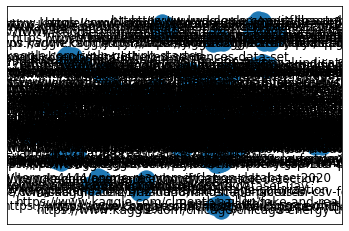

In [27]:
nx.draw_networkx(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


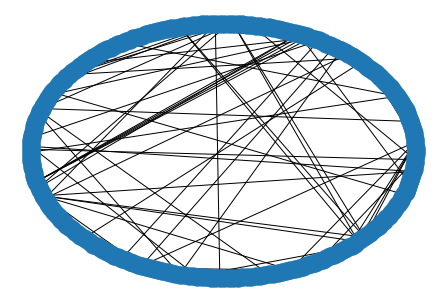

In [28]:
nx.draw_circular(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


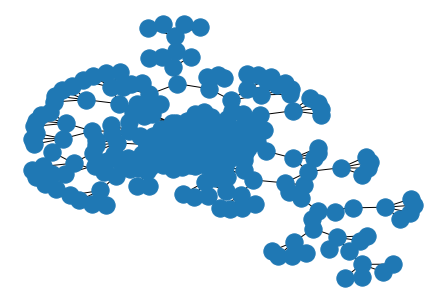

In [29]:
nx.draw_kamada_kawai(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


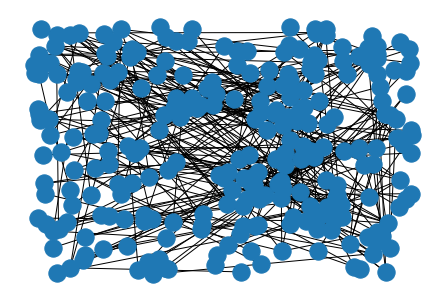

In [30]:
nx.draw_random(G)

/home/chongmin/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


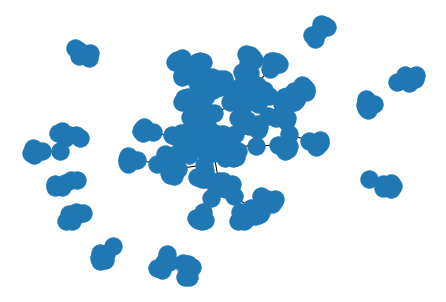

In [31]:
nx.draw_spring(G)

In [33]:
# using pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True)
# load the networkx graph
net.from_nx(G)
# show
net.show('example.html')

Edge with weights

In [ ]:
# https://frhyme.github.io/python-lib/draw_network(study)/